In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
def bn(c,d,n,L):
    part1 = 2*np.pi*n*(d*np.sin(np.pi*d*n) - c*np.sin(np.pi*c*n))+ (2-(np.pi**2)*d**2*n**2)*np.cos(np.pi*d*n)
    return L**2 * ((np.pi** 2 * c**2 * n**2 -2)*np.cos(np.pi*c*n) + part1 )/(np.pi**3 * n**3)

In [22]:
def an(c,d,n,L):
    part1 = -2*np.pi*n*c*(np.cos(np.pi*c*n))+ (np.pi**2*d**2*n**2 -2)*np.sin(np.pi*d*n) + 2*np.pi*d*n*np.cos(np.pi*d*n)
    return L**2 * ((2 - np.pi** 2 * c**2 * n**2)*np.sin(np.pi*c*n) + part1 )/(np.pi**3 * n**3)

In [23]:
def a0(c,d,L):
    return L**2*(d**3-c**3)/3


In [24]:
def funa(c,d,n,L,t):
    return an(c,d,n,L)*np.cos(n*np.pi*t/L)

In [25]:
def funb(c,d,n,L,t):
    return bn(c,d,n,L)*np.sin(n*np.pi*t/L)

In [26]:
ns = np.arange(1,10)
c = -0.5
d = 0.5
L = np.pi
t = 0

In [27]:
def suma(c,d,ns,L,t):
    return np.vectorize(lambda n:funa(c,d,n,L,t))(ns).sum()

In [28]:
def sumb(c,d,ns,L,t):
    return np.vectorize(lambda n:funb(c,d,n,L,t))(ns).sum()

In [29]:
def fun(c,d,n,L,t):
    ns = np.arange(1,n)
    a0 = L**2*(d**3 - c**3)/3
    return suma(c,d,ns,L,t) + sumb(c,d,ns,L,t) + a0/2

In [30]:
fun(c,d,50,L,t)

0.016112586314373123

In [31]:
ts = np.arange(-3,3,0.01)

In [32]:
len(ts)

600

In [33]:
def actual(c,d,L,t):
    if (c*L)<t and t < d*L:
        return t**2
    else:
        return 0.

In [34]:
truths = np.vectorize(lambda thist: actual(c,d,L,thist))(ts)

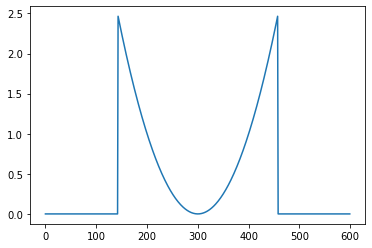

In [35]:
plt.plot(truths)

In [36]:
func = np.vectorize(lambda thist: fun(c,d,100,L,thist))(ts)

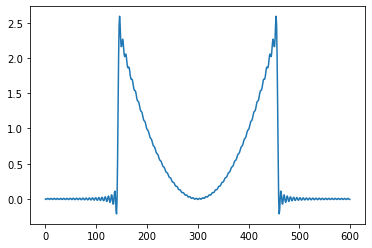

In [37]:
# plt.plot(truths)
plt.plot(func)